# Lab Assignment Seven: Recurrent Network Architectures


In [69]:
import pandas as pd
df = pd.read_csv('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/TextClassification_Data.csv',encoding = "ISO-8859-1")
df.head()


,fileid,SUMMARY,DATA,categories,sub_categories,previous_appointment,ID
0,2015561331001,Pt aware that he needs ROV for refill,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,PRESCRIPTION,REFILL,No,2015_5_6133_1001
1,2015561341001,Mom wants to know if the Focalin needs some do...,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6134_1001
2,2015561351001,pt called to discuss nortryptiline. she says s...,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6135_1001
3,2015561361001,FYI Nortryptline medication.,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,MISCELLANEOUS,OTHERS,No,2015_5_6136_1001
4,2015561371001,Letter of patient establishment request,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,MISCELLANEOUS,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)",No,2015_5_6137_1001


Health Care Services range from basic medical diagnostics to critical emergency services. The provider follows a ticketing system for all the telephonic calls received across all the departments. Calls to the provider can be for New Appointment, Cancellation, Lab Queries, Medical Refills, Insurance Related, General Doctor Advise etc. The Tickets have the details of Summary of the call and description of the calls written by various staff members with no standard text guidelines. We investigate to see if, based on the Text in the ‘Summary’ and ‘Description’ of the call, the ticket can be automatically classified to Appropriate Category (out of 6 Categories) and Subcategories (Out of 21 Sub Categories) with good accuracy using Machine learning approach. We use the bag of words approach to solve the problem. Further we would try different data feature representation methods using Document Term Matrix ( tf, tf-idf, binary-tf,) and different Machine learning algorithms and see which performs better, and try to reason why one works better than the other. Reference: https://www.kaggle.com/jsreddy79/text-classification-supervised-learning?fbclid=IwAR242MYwk-PMci6QYv9UBoabeSTTStuOfZVgFSU80V4FYm8Q7S0Vz5oNwPg

# Data Preparation

1. Show the general info about the data

In [70]:
# The size of the data
df.count()

fileid                  57280
SUMMARY                 53933
DATA                    57280
categories              57280
sub_categories          57280
previous_appointment    57278
ID                      57280
dtype: int64

In [71]:
#Check Number of classes
print(df.categories.unique())
print(len(df.categories.unique()))

['PRESCRIPTION' 'ASK_A_DOCTOR' 'MISCELLANEOUS' 'APPOINTMENTS' 'LAB' 'JUNK'
 'mISCELLANEOUS' 'asK_A_DOCTOR']
8


In [72]:
#Check the class imbalance problem
for i in df.categories.unique():
    print(df.categories[df.categories == i].count())

15096
11799
12167
13872
4321
21
3
1


First, let's get rid of the miss-spelling classes

In [73]:
#Replace those low/upper case miss-spelling issue
df = df.replace('asK_A_DOCTOR','ASK_A_DOCTOR')
df = df.replace('mISCELLANEOUS','MISCELLANEOUS')

In [74]:
#Double-Check the class imbalance problem
for i in df.categories.unique():
    print(df.categories[df.categories == i].count())

15096
11800
12170
13872
4321
21


In [75]:
#Double-Check Number of classes
print(df.categories.unique())
print(len(df.categories.unique()))

['PRESCRIPTION' 'ASK_A_DOCTOR' 'MISCELLANEOUS' 'APPOINTMENTS' 'LAB' 'JUNK']
6


Since we are only intherested in the reason for patient coming to the place, we decide to get rid of the "JUNK" and "LAB" classes (Coming for the lab is kinda vague. We do not know whether the patient come to the lab or the lab examier come to the lab).

In [76]:
df = df.replace('JUNK','NaN')
df = df.replace('LAB','NaN')
df = df[df.categories != 'NaN']
df = df.dropna()

In [77]:
#Double-Check Number of classes
print(df.categories.unique())
print(len(df.categories.unique()))

['PRESCRIPTION' 'ASK_A_DOCTOR' 'MISCELLANEOUS' 'APPOINTMENTS']
4


In [78]:
#Double-Check the class imbalance problem
for i in df.categories.unique():
    print(df.categories[df.categories == i].count())

14500
11744
10462
12960


In [79]:
X = df.SUMMARY
y = df.categories

#print ([y=='Nan'])
for i in y:
    if i == 'NaN':
        print (i)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit(y).transform(y)

print (len(X),len(y))
print (le.classes_)

49666 49666
['APPOINTMENTS' 'ASK_A_DOCTOR' 'MISCELLANEOUS' 'PRESCRIPTION']


## Tokenize the text
Tokenize all text(word by word) into a sequence of integers so it would take less memory.

In [16]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np


NUM_TOP_WORDS = None
MAX_ART_LEN = 100 # maximum number of words for each text

tokenizer = Tokenizer(num_words=NUM_TOP_WORDS)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

word_index = tokenizer.word_index
NUM_TOP_WORDS = len(word_index) if NUM_TOP_WORDS==None else NUM_TOP_WORDS
top_words = min((len(word_index),NUM_TOP_WORDS))
print('Found %s unique tokens. Distilled to %d top words.' % (len(word_index),top_words))

X = pad_sequences(sequences, maxlen=MAX_ART_LEN)

y_ohe = keras.utils.to_categorical(y)
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y_ohe.shape)
print(np.max(X))

C:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 10188 unique tokens. Distilled to 10188 top words.
Shape of data tensor: (49666, 100)
Shape of label tensor: (49666, 4)
10188


Sinc we have nearly 50k data, we assume that our data set is bigger enough to avoid data snopping by performing 80/20 splits (we performed the k-fold for the architecture 1 and the architecture 2 with the optimal parameter).

In [17]:
from sklearn.model_selection import train_test_split
# Split it into train / test subsets
X_train, X_test, y_train_ohe, y_test_ohe = train_test_split(X, y_ohe, test_size=0.2)
NUM_CLASSES = y_ohe.shape[1]
n_classes = NUM_CLASSES
#print (y_ohe)
print ('Number of classes',y_ohe.shape[1])
print(X_train.shape,y_train_ohe.shape)
print(np.sum(y_train_ohe,axis=0))

y_test = np.round(np.argmax(y_test_ohe,axis=1))
y_train = np.round(np.argmax(y_train_ohe,axis=1))

#Although we did a 80/20 splits here, we performed k-folds in the future

Number of classes 4
(39732, 100) (39732, 4)
[10325.  9465.  8334. 11608.]


In [18]:
EMBED_SIZE = 100
# the embed size should match the file you load glove from
embeddings_index = {}
f = open('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/glove.6B.100d.txt','r', encoding = 'utf8')
# save key/array pairs of the embeddings
#  the key of the dictionary is the word, the array is the embedding
name = []
for line in f:
    values = line.split()
    word = values[0]
    name.append(word)
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

print(embedding_matrix.shape)

Found 400000 word vectors.
(10189, 100)


In [292]:
from keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],
                            input_length=MAX_ART_LEN,
                            trainable=False)

In [293]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import average 
from keras.models import Input, Model
from keras.layers import average, concatenate
from keras.models import Input, Model
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
from sklearn.metrics import accuracy_score
%matplotlib inline

def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    #print (y_test.shape,yhat.shape)
    acc = mt.accuracy_score(y_test,yhat)
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.title(title_text+'{:.4f}'.format(acc))
    return cm

##  Metrics measurement

**Which method/ratio?**
Accuracy

**accuracy score**

Since there is no class imbalance and we are not senstive to any of the classes, it is totally fine to use accuracy as our metrics measurment



##  Cross Validation method

Our data set is unique, since it has a time series effect, and it has class imbalance problem in it. Since time series is out of the scope of this lab and we want to make our life easier, we will just deal with the class imbalance problem and assume that there is no time series effect, which means that the flight delays are independent of each other and the delay of a specific flight doesn't give any additional information of the delay of any other flight. But realistically this assumption is totally fine, since the flights are mainly delayed because of the security, aircraft, and airlne delays from the origin and rarely from the destinantion. so we think it's a very rasonable assumption to take.


For the method of dividing the training and testing data, we believe this is the most important key for a succesful deployment of a machine learning algorithm, since there is alot of data now a day, any machine learning project will be trained on a sample of the desired population. assuming that the sample is representitve of the population, we want to make sure we are learning from the data not memorizing! in order to expplain this, let's assume a situation where in a machine learning class the students have a midterm and the professor has given the students 3 page notes that summarizes what will be in the midterm. If the midterm is exactly from the 3 page notes, that is what we call overfit(low bias, high variance). if it's completely different they will have a simple approach and that underfit(low variance, high bias). if it's some how similar to the notes but different at the same time, we will have a perfect fit(sweet spot of the bias variance tradeoff)! this is a really good visualization of the situation we described



<img src="https://raw.githubusercontent.com/M-Elsaied/NYC-Taxi-Analysis/master/data/Visualization/fitting.png" alt="FittingCurves" width="800" height="600" title="FittingCurves">

So what we want is to help the algorithm to understand the data and not memorize it, so if we do a simple train, test split the model can overfit or underfit, depending on what is in the training set.

In order to solve the bias-variance trade off we can use the Kfold cross validation, which sample without replacment into Kfolds and thus have k-1 train and the test set would be the kth fold and then can run k models on the k folds and then take the average of these models, this way we have a stable, and consistent model(It's the same idea of ensembles, but the only difference that it aggregates the same model on different folds of the data by thaking the average and it usually decreases the variance)!
Beside that, it's a really powerful tool for the hyperparameters tuning via grid search.

For the number of K folds, it's a bias-variance tradeoff where after alot of simulations by Trevor Hestie & Rob Tibsharani, it appears that k between 5 and 10 is the best number as shown in the figure below(figure from ISL chapter 5)

<img src="https://raw.githubusercontent.com/M-Elsaied/NYC-Taxi-Analysis/master/data/Visualization/kfold.PNG" alt="FittingCurves" width="600" height="400" title="FittingCurves">

There is also emperical evidence that shows a good standard for value of k is 10, where experiments by Ron Kohavi on various real-world datasets suggest the 10-fold cross-validation offers the best bias-variance tradeoff.

Given all of this we have choosen 3-fold stratified cross validation for computational resource (it takes too long to run each fold). We assumed that there is no class imbalance, but stratified kfold works the same as kfold when there is no class imbalance so that's why we are using it(and because we are too lazy to change the code from previous lab)

# Building Architecture for RNN

For this part, we implimented two architectures with two different parameter, and an architecture 3. For the first two architures, we used the optimal (the better parameter) to run the k-fold (folds = 3).

We later on used MC test to test the accuracy score difference between different architectures
## Architecture 1

In [294]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM



In [295]:
def test_arch1(X_train,X_test,y_train_ohe,y_test_ohe,v,e):
    rnn = Sequential()
    rnn.add(embedding_layer)
    rnn.add(LSTM(100,dropout=0.2, recurrent_dropout=0.2))
    rnn.add(Dense(NUM_CLASSES, activation='sigmoid'))
    rnn.compile(loss='categorical_crossentropy', 
                  optimizer='rmsprop', 
                  metrics=['accuracy'])

    # Let's train the model 
    rnn.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras

    bath_size = 32
    history = rnn.fit(X_train, y_train_ohe, batch_size=32, 
                      #steps_per_epoch=int(len(X_train)/bath_size), # how many generators to go through per epoch
                      epochs=e, verbose=v,
                      validation_data=(X_test,y_test_ohe),# validation_steps=1,
                      callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
                     )
    pred = np.round(np.argmax(rnn.predict(X_test),axis=1))
        #print(pred,y_test)
    #print (mt.confusion_matrix(np.round(np.argmax(y_test_ohe,axis =1)),pred))
    c = accuracy_score(np.round(np.argmax(y_test_ohe,axis =1)), pred)

    
    result = np.round(rnn.predict(X_test))
    
    
    
    return history,rnn,c,pred, result

In [296]:
history_1,model_1,c_1,pred_1, result = test_arch1(X_train,X_test,y_train_ohe,y_test_ohe,1,10) # last two are verbose and epochs
#model_1.summary()

Train on 39732 samples, validate on 9934 samples
Epoch 1/10
39732/39732 [==============================] - 311s 8ms/step - loss: 0.8451 - acc: 0.6798 - val_loss: 0.7168 - val_acc: 0.7310
Epoch 2/10
39732/39732 [==============================] - 293s 7ms/step - loss: 0.7066 - acc: 0.7399 - val_loss: 0.6824 - val_acc: 0.7463
Epoch 3/10
39732/39732 [==============================] - 289s 7ms/step - loss: 0.6640 - acc: 0.7558 - val_loss: 0.6555 - val_acc: 0.7599
Epoch 4/10
39732/39732 [==============================] - 291s 7ms/step - loss: 0.6377 - acc: 0.7648 - val_loss: 0.6382 - val_acc: 0.7683
Epoch 5/10
39732/39732 [==============================] - 295s 7ms/step - loss: 0.6191 - acc: 0.7708 - val_loss: 0.6322 - val_acc: 0.7691
Epoch 6/10
39732/39732 [==============================] - 307s 8ms/step - loss: 0.6042 - acc: 0.7764 - val_loss: 0.6316 - val_acc: 0.7693
Epoch 7/10
39732/39732 [==============================] - 297s 7ms/step - loss: 0.5926 - acc: 0.7813 - val_loss: 0.6335 - v

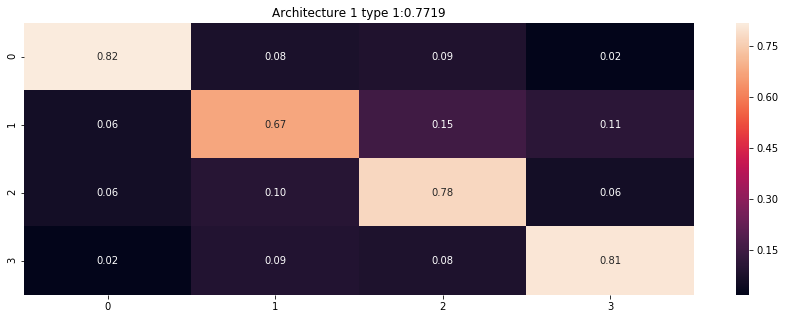

In [297]:
cm1 = summarize_net(model_1, X_test, y_test, title_text='Architecture 1 type 1:')

In [298]:
#save for further use
import pickle
h = open('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/CSCE 7324/MachineLearningNotebooks/project7/model1.pickle','wb')
pickle.dump([history_1,model_1,c_1,pred_1, result,cm1],h)

In [29]:
import pickle
h = open('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/CSCE 7324/MachineLearningNotebooks/project7/model1.pickle','rb')
history_1,model_1,c_1,pred_1,result_1,cm1 = pickle.load(h)
history_1


## Type 2 Architecture 1
## RNN LSTM

This is the same architecture 1 with changing tunning parameters.


In [300]:
# No change done yet. Please tweak some parameters

def test_arch1_type2(X_train,X_test,y_train_ohe,y_test_ohe,v,e):
    rnn = Sequential()
    rnn.add(embedding_layer)
    rnn.add(LSTM(100,dropout=0.2, recurrent_dropout=0.2))
    rnn.add(Dense(100, activation='relu'))
    rnn.add(Dense(NUM_CLASSES, activation='sigmoid'))
    rnn.compile(loss='categorical_crossentropy', 
                  optimizer='rmsprop', 
                  metrics=['accuracy'])

    # Let's train the model 
    rnn.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras

    bath_size = 32
    history = rnn.fit(X_train, y_train_ohe, batch_size=32, 
                      #steps_per_epoch=int(len(X_train)/bath_size), # how many generators to go through per epoch
                      epochs=e, verbose=v,
                      validation_data=(X_test,y_test_ohe),# validation_steps=1,
                      callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
                     )
    pred = np.round(np.argmax(rnn.predict(X_test),axis=1))
        #print(pred,y_test)
    #print (mt.confusion_matrix(np.round(np.argmax(y_test_ohe,axis =1)),pred))
    c = accuracy_score(np.round(np.argmax(y_test_ohe,axis =1)), pred)

    
    result = np.round(rnn.predict(X_test))
    
    
    
    return history,rnn,c,pred, result

In [301]:
history_1_type2,model_1_type2,c_1_type2,pred_1_type2,result_type2 = test_arch1_type2(X_train,X_test,y_train_ohe,y_test_ohe,1,10) # last two are verbose and epochs
#model_1.summary()

Train on 39732 samples, validate on 9934 samples
Epoch 1/10
39732/39732 [==============================] - 304s 8ms/step - loss: 0.8259 - acc: 0.6840 - val_loss: 0.6998 - val_acc: 0.7407
Epoch 2/10
39732/39732 [==============================] - 297s 7ms/step - loss: 0.6876 - acc: 0.7437 - val_loss: 0.6848 - val_acc: 0.7451
Epoch 3/10
39732/39732 [==============================] - 301s 8ms/step - loss: 0.6513 - acc: 0.7604 - val_loss: 0.6478 - val_acc: 0.7645
Epoch 4/10
39732/39732 [==============================] - 302s 8ms/step - loss: 0.6239 - acc: 0.7706 - val_loss: 0.6376 - val_acc: 0.7700
Epoch 5/10
39732/39732 [==============================] - 303s 8ms/step - loss: 0.6047 - acc: 0.7765 - val_loss: 0.6311 - val_acc: 0.7672
Epoch 6/10
39732/39732 [==============================] - 282s 7ms/step - loss: 0.5911 - acc: 0.7813 - val_loss: 0.6306 - val_acc: 0.7709
Epoch 7/10
39732/39732 [==============================] - 277s 7ms/step - loss: 0.5783 - acc: 0.7860 - val_loss: 0.6406 - v

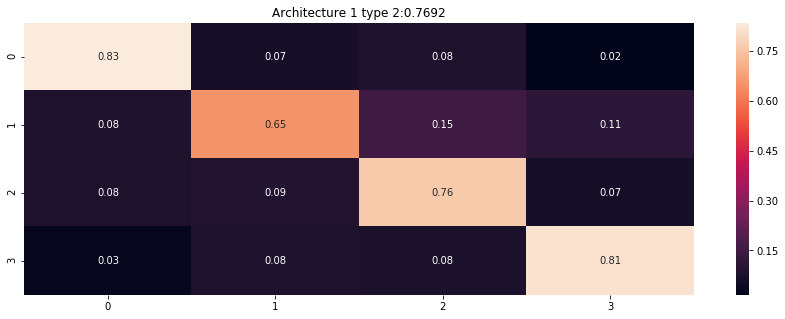

In [302]:
cm1_type2 = summarize_net(model_1_type2, X_test, y_test, title_text='Architecture 1 type 2:')

In [303]:
#save for further use
import pickle
h = open('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/CSCE 7324/MachineLearningNotebooks/project7/model1_type2.pickle','wb')
pickle.dump([history_1_type2,model_1_type2,c_1_type2,pred_1_type2, result_type2,cm1_type2],h)

In [30]:
import pickle
h = open('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/CSCE 7324/MachineLearningNotebooks/project7/model1_type2.pickle','rb')
history_1_type2,model_1_type2,c_1_type2,pred_1_type2, result_type2,cm1_type2 = pickle.load(h)
history_1_type2


## K-fold for best model in architecture 1

For the best type of architecture one we have decided to use K-fold. Since simulation time high we have decided to use K-fold only on one of them to be able to finish the project on time. Since this model is doing well on all of the data we believe it is going to do better on part of data. We need to use K-fold to be sure our model is not over trained by seeing all the data and will do well on the actuall results. For each fold we have used 10 epoches because of simulation time.

Since the type 1 architecture 1 is performing slightly better than the type 2 architecture 2 does (0.7719>0.7692), we chose type 1 architecuture 1 to perform the k-folds CV.


In [305]:
# Module need for drawing ROC curve
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


Automatically created module for IPython interactive environment


In [306]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt
costs_1 = []
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=64)
#temp_x = X_train[feature_cols].values
#temp_x = X_ints_train+ [X_train_num]+X_ints_test + [X_test_num]
#temp_y = np.array(y_train)
#print (temp_y)
#temp_y = np.array(temp_y)
#print (temp_x.shape)
#print (temp_y.shape)
ref = 1
#Create some variable to save each k-fold value
fpr_arch1 = []
tpr_arch1 = []
roc_auc_macro_arch1 = []
fpr_all_arch1 = []
tpr_all_arch1 = []
roc_auc_macro_all_arch1 = []
for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Now at step',ref,'in kfold ...')
    # build train and test samples from crossed cols and feature cols
    #print (y_train)
    X_train_temp = X_train[train_idx]
    y_train_temp = keras.utils.to_categorical(y_train[train_idx], n_classes)
    X_test_temp = X_train[test_idx]
    y_test_temp = keras.utils.to_categorical(y_train[test_idx], n_classes)
    #pred = np.argmax(model.predict(X_test_temp), axis=1)
    # take cost
    history,model,c,pred,result = test_arch1(X_train_temp,X_test_temp,y_train_temp,y_test_temp,1,10) # last two are verbose and epochs
    costs_1.append(c)
    # print confusion matrix
    print(mt.confusion_matrix(np.round(np.argmax(y_test_temp,axis =1)),pred), "=>", c)
    #ROC
    y_score =result ###specify the model we need here(I recommend to create a variable call result, which return the predict value of the model)
# Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    fpr_arch1.append(fpr["micro"])
    tpr_arch1.append(tpr["micro"])
    roc_auc_macro_arch1.append(roc_auc["micro"])
# Compute macro-average ROC curve and ROC area
    lw = 3
# First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    fpr_all_arch1.append(fpr["macro"])
    tpr_all_arch1.append(tpr["macro"])
    roc_auc_macro_all_arch1.append(roc_auc["macro"])
    ref+=1
print(costs_1)

Now at step 1 in kfold ...
Train on 26486 samples, validate on 13246 samples
Epoch 1/10
26486/26486 [==============================] - 205s 8ms/step - loss: 0.8819 - acc: 0.6616 - val_loss: 0.7559 - val_acc: 0.7185
Epoch 2/10
26486/26486 [==============================] - 198s 7ms/step - loss: 0.7395 - acc: 0.7245 - val_loss: 0.7060 - val_acc: 0.7380
Epoch 3/10
26486/26486 [==============================] - 199s 7ms/step - loss: 0.6874 - acc: 0.7469 - val_loss: 0.6675 - val_acc: 0.7558
Epoch 4/10
26486/26486 [==============================] - 202s 8ms/step - loss: 0.6575 - acc: 0.7584 - val_loss: 0.6532 - val_acc: 0.7614
Epoch 5/10
26486/26486 [==============================] - 201s 8ms/step - loss: 0.6307 - acc: 0.7675 - val_loss: 0.6544 - val_acc: 0.7591
Epoch 6/10
26486/26486 [==============================] - 202s 8ms/step - loss: 0.6146 - acc: 0.7756 - val_loss: 0.6450 - val_acc: 0.7630
Epoch 7/10
26486/26486 [==============================] - 201s 8ms/step - loss: 0.5975 - acc: 0

## Architecture 2

In [307]:
from keras.layers import GRU

def test_arch2(X_train,X_test,y_train_ohe,y_test_ohe,v,e):
    rnn = Sequential()
    rnn.add(embedding_layer)
    rnn.add(GRU(100,dropout=0.2, recurrent_dropout=0.2))
    rnn.add(Dense(NUM_CLASSES, activation='sigmoid'))
    rnn.compile(loss='categorical_crossentropy', 
                  optimizer='rmsprop', 
                  metrics=['accuracy'])

    # Let's train the model 
    rnn.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras

    bath_size = 32
    history = rnn.fit(X_train, y_train_ohe, batch_size=32, 
                      #steps_per_epoch=int(len(X_train)/bath_size), # how many generators to go through per epoch
                      epochs=e, verbose=v,
                      validation_data=(X_test,y_test_ohe),# validation_steps=1,
                      callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
                     )
    pred = np.round(np.argmax(rnn.predict(X_test),axis=1))
        #print(pred,y_test)
    #print (mt.confusion_matrix(np.round(np.argmax(y_test_ohe,axis =1)),pred))
    c = accuracy_score(np.round(np.argmax(y_test_ohe,axis =1)), pred)

    
    result = np.round(rnn.predict(X_test))
    
    
    
    return history,rnn,c,pred, result

In [308]:
history_2,model_2,c_2,pred_2,result_2 = test_arch2(X_train,X_test,y_train_ohe,y_test_ohe,1,10) # last two are verbose and epochs
#model_1.summary()

Train on 39732 samples, validate on 9934 samples
Epoch 1/10
39732/39732 [==============================] - 242s 6ms/step - loss: 0.8244 - acc: 0.6898 - val_loss: 0.7141 - val_acc: 0.7368
Epoch 2/10
39732/39732 [==============================] - 240s 6ms/step - loss: 0.6926 - acc: 0.7450 - val_loss: 0.6560 - val_acc: 0.7576
Epoch 3/10
39732/39732 [==============================] - 242s 6ms/step - loss: 0.6552 - acc: 0.7574 - val_loss: 0.6390 - val_acc: 0.7660
Epoch 4/10
39732/39732 [==============================] - 239s 6ms/step - loss: 0.6322 - acc: 0.7684 - val_loss: 0.6414 - val_acc: 0.7672
Epoch 5/10
39732/39732 [==============================] - 239s 6ms/step - loss: 0.6190 - acc: 0.7748 - val_loss: 0.6304 - val_acc: 0.7677
Epoch 6/10
39732/39732 [==============================] - 239s 6ms/step - loss: 0.6076 - acc: 0.7775 - val_loss: 0.6318 - val_acc: 0.7709
Epoch 7/10
39732/39732 [==============================] - 239s 6ms/step - loss: 0.5960 - acc: 0.7816 - val_loss: 0.6361 - v

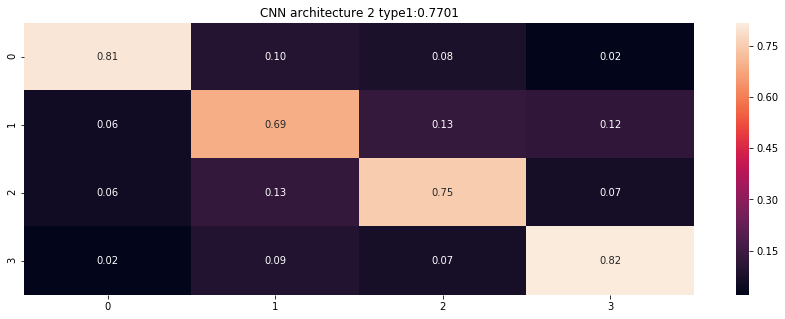

In [309]:
cm2 = summarize_net(model_2, X_test, y_test, title_text='CNN architecture 2 type1:')

In [310]:
#save for further use
import pickle
h = open('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/CSCE 7324/MachineLearningNotebooks/project7/model2.pickle','wb')
pickle.dump([history_2,model_2,c_2,pred_2, result_2,cm2],h)

In [33]:
import pickle
h = open('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/CSCE 7324/MachineLearningNotebooks/project7/model2.pickle','rb')
history_2,model_2,c_2,pred_2, result_2,cm2 = pickle.load(h)
history_2

## Type 2 Architecuture 2
RNN GRU

In [312]:
# No change done yet. Please tweak some parameters

def test_arch2_type2(X_train,X_test,y_train_ohe,y_test_ohe,v,e):
    rnn = Sequential()
    rnn.add(embedding_layer)
    rnn.add(GRU(100,dropout=0.2, recurrent_dropout=0.2))
    rnn.add(Dense(NUM_CLASSES, activation='sigmoid'))
    rnn.add(Dense(NUM_CLASSES, activation='sigmoid'))
    rnn.compile(loss='categorical_crossentropy', 
                  optimizer='rmsprop', 
                  metrics=['accuracy'])

    # Let's train the model 
    rnn.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras

    bath_size = 32
    history = rnn.fit(X_train, y_train_ohe, batch_size=32, 
                      #steps_per_epoch=int(len(X_train)/bath_size), # how many generators to go through per epoch
                      epochs=e, verbose=v,
                      validation_data=(X_test,y_test_ohe),# validation_steps=1,
                      callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
                     )
    pred = np.round(np.argmax(rnn.predict(X_test),axis=1))
        #print(pred,y_test)
    #print (mt.confusion_matrix(np.round(np.argmax(y_test_ohe,axis =1)),pred))
    c = accuracy_score(np.round(np.argmax(y_test_ohe,axis =1)), pred)

    
    result = np.round(rnn.predict(X_test))
    
    
    
    return history,rnn,c,pred, result

In [313]:
history_2_type2,model_2_type2,c_2_type2,pred_2_type2,result_2_type2 = test_arch2_type2(X_train,X_test,y_train_ohe,y_test_ohe,1,10) # last two are verbose and epochs
#model_1.summary()

Train on 39732 samples, validate on 9934 samples
Epoch 1/10
39732/39732 [==============================] - 243s 6ms/step - loss: 1.1784 - acc: 0.5287 - val_loss: 1.0487 - val_acc: 0.6069
Epoch 2/10
39732/39732 [==============================] - 235s 6ms/step - loss: 0.9831 - acc: 0.6360 - val_loss: 0.8952 - val_acc: 0.7124
Epoch 3/10
39732/39732 [==============================] - 235s 6ms/step - loss: 0.8303 - acc: 0.7316 - val_loss: 0.7618 - val_acc: 0.7551
Epoch 4/10
39732/39732 [==============================] - 235s 6ms/step - loss: 0.7308 - acc: 0.7591 - val_loss: 0.7072 - val_acc: 0.7610
Epoch 5/10
39732/39732 [==============================] - 239s 6ms/step - loss: 0.6843 - acc: 0.7684 - val_loss: 0.6797 - val_acc: 0.7661
Epoch 6/10
39732/39732 [==============================] - 240s 6ms/step - loss: 0.6526 - acc: 0.7760 - val_loss: 0.6707 - val_acc: 0.7684
Epoch 7/10
39732/39732 [==============================] - 239s 6ms/step - loss: 0.6375 - acc: 0.7806 - val_loss: 0.6589 - v

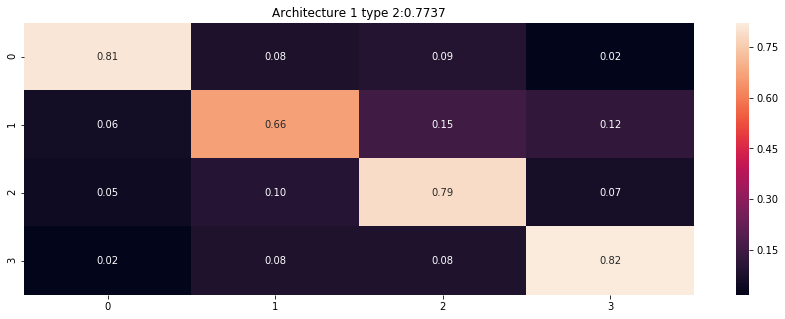

In [314]:
cm2_type2 = summarize_net(model_2_type2, X_test, y_test, title_text='Architecture 1 type 2:')

In [315]:
#save for further use
import pickle
h = open('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/CSCE 7324/MachineLearningNotebooks/project7/model2_type2.pickle','wb')
pickle.dump([history_2_type2,model_2_type2,c_2_type2,pred_2_type2, result_2_type2,cm2_type2],h)

In [34]:
import pickle
h = open('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/CSCE 7324/MachineLearningNotebooks/project7/model2_type2.pickle','rb')
history_2_type2,model_2_type2,c_2_type2,pred_2_type2, result_2_type2,cm2_type2 = pickle.load(h)
history_2_type2


## K-fold for best model in architecture 2

Since type 2 architecuture 2 performed slightly better than the type 1 architecure 1 did (0.7737 > 0.7701), we chose type 2 architecture 2 to run the k-folds CV.


In [317]:
# Module need for drawing ROC curve
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


Automatically created module for IPython interactive environment


In [318]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt
costs_2 = []
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=64)
#temp_x = X_train[feature_cols].values
#temp_x = X_ints_train+ [X_train_num]+X_ints_test + [X_test_num]
#temp_y = np.array(y_train)
#print (temp_y)
#temp_y = np.array(temp_y)
#print (temp_x.shape)
#print (temp_y.shape)
ref = 1
#Create some variable to save each k-fold value
fpr_arch2 = []
tpr_arch2 = []
roc_auc_macro_arch2 = []
fpr_all_arch2 = []
tpr_all_arch2 = []
roc_auc_macro_all_arch2 = []
for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Now at step',ref,'in kfold ...')
    # build train and test samples from crossed cols and feature cols
    #print (y_train)
    X_train_temp = X_train[train_idx]
    y_train_temp = keras.utils.to_categorical(y_train[train_idx], n_classes)
    X_test_temp = X_train[test_idx]
    y_test_temp = keras.utils.to_categorical(y_train[test_idx], n_classes)
    #pred = np.argmax(model.predict(X_test_temp), axis=1)
    # take cost
    history,model,c,pred,result = test_arch2_type2(X_train_temp,X_test_temp,y_train_temp,y_test_temp,1,10) # last two are verbose and epochs
    costs_2.append(c)
    # print confusion matrix
    print(mt.confusion_matrix(np.round(np.argmax(y_test_temp,axis =1)),pred), "=>", c)
    #ROC
    y_score =result ###specify the model we need here(I recommend to create a variable call result, which return the predict value of the model)
# Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    fpr_arch2.append(fpr["micro"])
    tpr_arch2.append(tpr["micro"])
    roc_auc_macro_arch2.append(roc_auc["micro"])
# Compute macro-average ROC curve and ROC area
    lw = 3
# First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    fpr_all_arch2.append(fpr["macro"])
    tpr_all_arch2.append(tpr["macro"])
    roc_auc_macro_all_arch2.append(roc_auc["macro"])
    ref+=1
print(costs_2)

Now at step 1 in kfold ...
Train on 26486 samples, validate on 13246 samples
Epoch 1/10
26486/26486 [==============================] - 182s 7ms/step - loss: 1.1319 - acc: 0.5495 - val_loss: 1.0077 - val_acc: 0.6807
Epoch 2/10
26486/26486 [==============================] - 174s 7ms/step - loss: 0.9425 - acc: 0.7021 - val_loss: 0.8688 - val_acc: 0.7284
Epoch 3/10
26486/26486 [==============================] - 174s 7ms/step - loss: 0.8296 - acc: 0.7339 - val_loss: 0.7785 - val_acc: 0.7470
Epoch 4/10
26486/26486 [==============================] - 174s 7ms/step - loss: 0.7520 - acc: 0.7510 - val_loss: 0.7303 - val_acc: 0.7565
Epoch 5/10
26486/26486 [==============================] - 174s 7ms/step - loss: 0.7050 - acc: 0.7623 - val_loss: 0.7023 - val_acc: 0.7611
Epoch 6/10
26486/26486 [==============================] - 174s 7ms/step - loss: 0.6737 - acc: 0.7689 - val_loss: 0.6868 - val_acc: 0.7634
Epoch 7/10
26486/26486 [==============================] - 175s 7ms/step - loss: 0.6504 - acc: 0

In [319]:
#save for further use
import pickle
h = open('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/CSCE 7324/MachineLearningNotebooks/project7/model2_kfold.pickle','wb')
pickle.dump([costs_2,fpr_arch2,tpr_arch2,roc_auc_macro_arch2,fpr_all_arch2,tpr_all_arch2,roc_auc_macro_all_arch2],h)

In [320]:
import pickle
h = open('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/CSCE 7324/MachineLearningNotebooks/project7/model2_kfold.pickle','rb')
costs_2,fpr_arch2,tpr_arch2,roc_auc_macro_arch2,fpr_all_arch2,tpr_all_arch2,roc_auc_macro_all_arch2 = pickle.load(h)
costs_2

[0.7651366450249132, 0.774992449411054, 0.7717112218698082]

ROC curve for both k-folds result

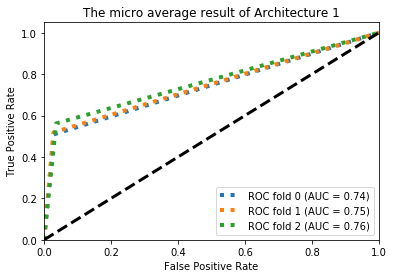

The average ROC is: 0.7494264635055546


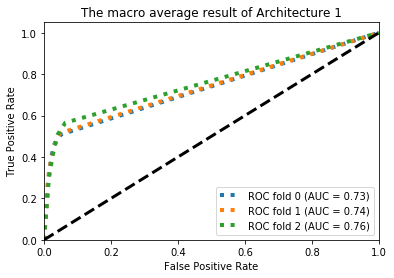

The average ROC is: 0.7438394794520251


In [321]:
for i in range(len(fpr_arch1)):
    plt.plot(fpr_arch1[i], tpr_arch1[i],
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_macro_arch1[i]),
              linestyle=':', linewidth=4)


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The micro average result of Architecture 1')
plt.legend(loc="lower right")
plt.show()
print("The average ROC is:" ,np.mean(roc_auc_macro_arch1))




for i in range(len(fpr_all_arch1)):
    plt.plot(fpr_all_arch1[i], tpr_all_arch1[i],
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_macro_all_arch1[i]),
              linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The macro average result of Architecture 1')
plt.legend(loc="lower right")
plt.show()

print("The average ROC is:" ,np.mean(roc_auc_macro_all_arch1))




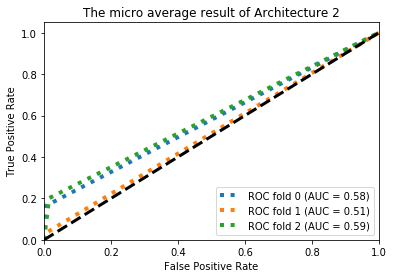

The average ROC is: 0.5621168568755187


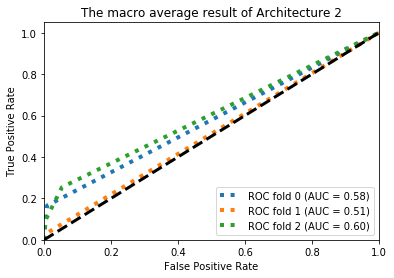

The average ROC is: 0.5641610650555983


In [322]:
for i in range(len(fpr_arch2)):
    plt.plot(fpr_arch2[i], tpr_arch2[i],
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_macro_arch2[i]),
              linestyle=':', linewidth=4)


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The micro average result of Architecture 2')
plt.legend(loc="lower right")
plt.show()

print("The average ROC is:" ,np.mean(roc_auc_macro_arch2))



for i in range(len(fpr_all_arch2)):
    plt.plot(fpr_all_arch2[i], tpr_all_arch2[i],
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_macro_all_arch2[i]),
              linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The macro average result of Architecture 2')
plt.legend(loc="lower right")
plt.show()

print("The average ROC is:" ,np.mean(roc_auc_macro_all_arch2))

## Architecture 3
Stacking two LSTM

In [323]:
def test_arch3(X_train,X_test,y_train_ohe,y_test_ohe,v,e):
    rnn = Sequential()
    rnn.add(embedding_layer)
    rnn.add(LSTM(100,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
    rnn.add(LSTM(100,dropout=0.2, recurrent_dropout=0.2))
    rnn.add(Dense(NUM_CLASSES, activation='sigmoid'))
    rnn.compile(loss='categorical_crossentropy', 
                  optimizer='rmsprop', 
                  metrics=['accuracy'])

    # Let's train the model 
    rnn.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras

    bath_size = 32
    history = rnn.fit(X_train, y_train_ohe, batch_size=32, 
                      #steps_per_epoch=int(len(X_train)/bath_size), # how many generators to go through per epoch
                      epochs=e, verbose=v,
                      validation_data=(X_test,y_test_ohe),# validation_steps=1,
                      callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
                     )
    pred = np.round(np.argmax(rnn.predict(X_test),axis=1))
        #print(pred,y_test)
    #print (mt.confusion_matrix(np.round(np.argmax(y_test_ohe,axis =1)),pred))
    c = accuracy_score(np.round(np.argmax(y_test_ohe,axis =1)), pred)

    
    result = np.round(rnn.predict(X_test))
    
    
    
    return history,rnn,c,pred, result

In [324]:
history_3,model_3,c_3,pred_3,result_3 = test_arch3(X_train,X_test,y_train_ohe,y_test_ohe,1,10) # last two are verbose and epochs
#model_1.summary()

Train on 39732 samples, validate on 9934 samples
Epoch 1/10
39732/39732 [==============================] - 577s 15ms/step - loss: 0.8441 - acc: 0.6736 - val_loss: 0.7238 - val_acc: 0.7323
Epoch 2/10
39732/39732 [==============================] - 566s 14ms/step - loss: 0.7003 - acc: 0.7426 - val_loss: 0.6725 - val_acc: 0.7563
Epoch 3/10
39732/39732 [==============================] - 567s 14ms/step - loss: 0.6569 - acc: 0.7571 - val_loss: 0.6436 - val_acc: 0.7662
Epoch 4/10
39732/39732 [==============================] - 567s 14ms/step - loss: 0.6312 - acc: 0.7677 - val_loss: 0.6323 - val_acc: 0.7700
Epoch 5/10
39732/39732 [==============================] - 569s 14ms/step - loss: 0.6152 - acc: 0.7740 - val_loss: 0.6235 - val_acc: 0.7714
Epoch 6/10
39732/39732 [==============================] - 567s 14ms/step - loss: 0.6021 - acc: 0.7770 - val_loss: 0.6269 - val_acc: 0.7738
Epoch 7/10
39732/39732 [==============================] - 565s 14ms/step - loss: 0.5901 - acc: 0.7833 - val_loss: 0.6

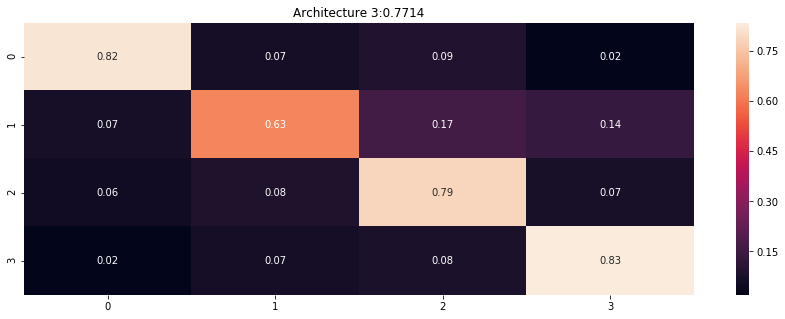

In [325]:
cm3 = summarize_net(model_3, X_test, y_test, title_text='Architecture 3:')

In [326]:
#save for further use
import pickle
h = open('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/CSCE 7324/MachineLearningNotebooks/project7/model3.pickle','wb')
pickle.dump([history_3,model_3,c_3,pred_3, result_3,cm3],h)

In [35]:
import pickle
h = open('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/CSCE 7324/MachineLearningNotebooks/project7/model3.pickle','rb')
history_3,model_3,c_3,pred_3, result_3,cm3 = pickle.load(h)
history_3

## Ploting loss and accuracy

Text(0.5,0,'epochs')

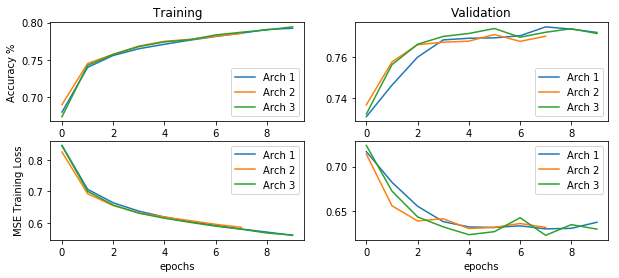

In [328]:
from matplotlib import pyplot as plt

%matplotlib inline

legends=['Arch 1','Arch 2','Arch 3']
plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history_1.history['acc'])
plt.plot(history_2.history['acc'])
plt.plot(history_3.history['acc'])
plt.legend(legends)

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history_1.history['val_acc'])
plt.plot(history_2.history['val_acc'])
plt.plot(history_3.history['val_acc'])
plt.legend(legends)
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history_1.history['loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.ylabel('MSE Training Loss')
plt.legend(legends)
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history_1.history['val_loss'])
plt.plot(history_2.history['val_loss'])
plt.plot(history_3.history['val_loss'])
plt.legend(legends)
plt.xlabel('epochs')

## ROC Comparison

We compared out algorightms with the logistic regression algorithm, multiple linear regression algorithm, and random forest algorithm by using macro ROC and micro ROC.

Linear_regression : 0.2556875377491444


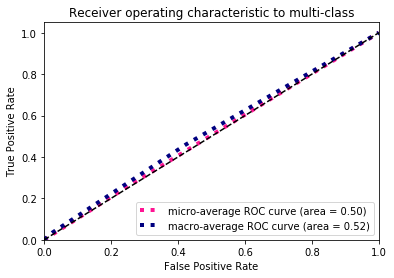

MLP : 0.3077310247634387


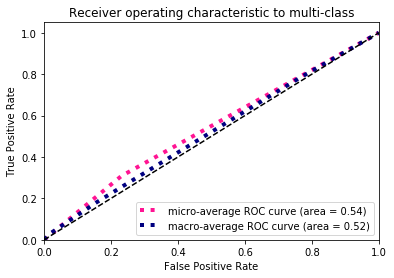

Random_forest : 0.630964364807731


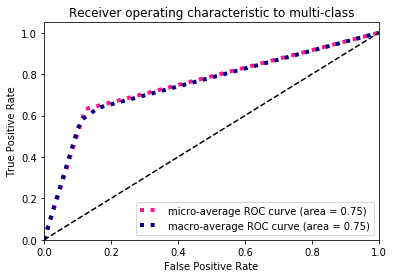

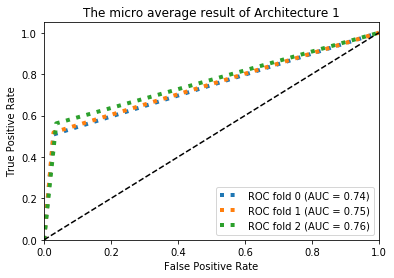

The average ROC is: 0.7494264635055546


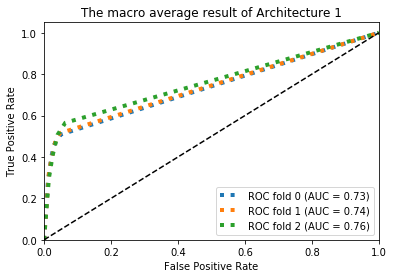

The average ROC is: 0.7438394794520251


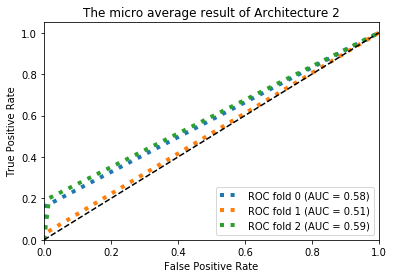

The average ROC is: 0.5621168568755187


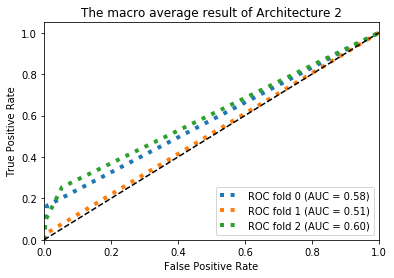

The average ROC is: 0.5641610650555983


In [329]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
mods = [LR(), MLP(), RF(n_estimators = 100)]
dic = {1:'Linear_regression',2:'MLP',3:'Random_forest'}
count = 1
for mod in mods:
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    #print (y_pred)
    print (dic[count],':',accuracy_score(y_test,y_pred ))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_test1 = keras.utils.to_categorical(y_test, n_classes) 
    y_score = keras.utils.to_categorical(y_pred, n_classes)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()
    count+=1
    
    
    
    
for i in range(len(fpr_arch1)):
    plt.plot(fpr_arch1[i], tpr_arch1[i],
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_macro_arch1[i]),
              linestyle=':', linewidth=4)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The micro average result of Architecture 1')
plt.legend(loc="lower right")
plt.show()
print("The average ROC is:" ,np.mean(roc_auc_macro_arch1))



for i in range(len(fpr_all_arch1)):
    plt.plot(fpr_all_arch1[i], tpr_all_arch1[i],
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_macro_all_arch1[i]),
              linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The macro average result of Architecture 1')
plt.legend(loc="lower right")
plt.show()
print("The average ROC is:" ,np.mean(roc_auc_macro_all_arch1))





for i in range(len(fpr_arch2)):
    plt.plot(fpr_arch2[i], tpr_arch2[i],
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_macro_arch2[i]),
              linestyle=':', linewidth=4)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The micro average result of Architecture 2')
plt.legend(loc="lower right")
plt.show()
print("The average ROC is:" ,np.mean(roc_auc_macro_arch2))




for i in range(len(fpr_all_arch2)):
    plt.plot(fpr_all_arch2[i], tpr_all_arch2[i],
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_macro_all_arch2[i]),
              linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The macro average result of Architecture 2')
plt.legend(loc="lower right")
plt.show()

print("The average ROC is:" ,np.mean(roc_auc_macro_all_arch2))

Based on the ROC result and the accuracy score, our type 1 architecture 1 out-performed than any other algorithms we have tested.

## MC text for statistical comparision (need explanation (2))

# Statistical Comparison

The McNemar’s test operates upon a contingency table.


A contingency table is a tabulation or count of two categorical variables. In the case of the McNemar’s test, we are interested in binary variables correct/incorrect or yes/no for a control and a treatment or two cases. This is called a 2×2 contingency table.


The statistical concepts

McNemar's test statistic (Chi-Squared test) has a null hypothesis of the 2 models are statistically insignificant and the alternative hypothesis is that they are statistically different.

We assume 95% confidence then alpha = 0.05 we can compute the p-value assuming that the null hypothesis is true, the p-value is the probability of observing this empirical (or a larger) chi-squared value. If the p-value is lower than our chosen significance level, we can reject the null hypothesis that the two model's performances are equal.

We will compare all the models against each other model 1 type 1 and type 2 are not different from each other.
model 2 type 1 and type 2 are not statistically different.
We compare model 1 type 1 with model 2 type 2 and they are not statistically different.
Finally, we compare model 1 type 1 with model 3 and they are not statistically different as well

In [31]:
#contingency table
#between pred_1 and pred_1_type2

import numpy as np
from mlxtend.evaluate import mcnemar_table

# The correct target (class) labels
y_target = y_test.ravel()

# Class labels predicted by model 1
y_model1 = pred_1
# Class labels predicted by model 2
y_model2 = pred_1_type2
tb = mcnemar_table(y_target=y_target, 
                   y_model1=y_model1, 
                   y_model2=y_model2)

print(tb)
#McNimar's test
from mlxtend.evaluate import mcnemar

chi2, p = mcnemar(ary=tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)
#this means they are the same

[[2372  153]
 [ 171 7238]]
chi-squared: 0.8919753086419753
p-value: 0.3449425788286167


In [36]:
#contingency table
#between pred_2 and pred_2_type2

import numpy as np
from mlxtend.evaluate import mcnemar_table


# Class labels predicted by model 1
y_model1 = pred_2
# Class labels predicted by model 2
y_model2 = pred_2_type2
tb = mcnemar_table(y_target=y_target, 
                   y_model1=y_model1, 
                   y_model2=y_model2)

print(tb)
#McNimar's test
from mlxtend.evaluate import mcnemar

chi2, p = mcnemar(ary=tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)
#pred_2_type2

[[2380  160]
 [ 159 7235]]
chi-squared: 0.0
p-value: 1.0


In [38]:
#contingency table
#between pred_1 and pred_2_type2

import numpy as np
from mlxtend.evaluate import mcnemar_table


# Class labels predicted by model 1
y_model1 = pred_1
# Class labels predicted by model 2
y_model2 = pred_2_type2
tb = mcnemar_table(y_target=y_target, 
                   y_model1=y_model1, 
                   y_model2=y_model2)

print(tb)
#McNimar's test
from mlxtend.evaluate import mcnemar

chi2, p = mcnemar(ary=tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)
#pred_2_type2

[[2379  161]
 [ 164 7230]]
chi-squared: 0.012307692307692308
p-value: 0.9116638948284465


In [39]:
#contingency table
#between pred_3 and pred_2_type2

import numpy as np
from mlxtend.evaluate import mcnemar_table


# Class labels predicted by model 1
y_model1 = pred_1
# Class labels predicted by model 2
y_model2 = pred_3
tb = mcnemar_table(y_target=y_target, 
                   y_model1=y_model1, 
                   y_model2=y_model2)

print(tb)
#McNimar's test
from mlxtend.evaluate import mcnemar

chi2, p = mcnemar(ary=tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)
#pred_2_type2 is better

[[2373  176]
 [ 170 7215]]
chi-squared: 0.07225433526011561
p-value: 0.7880823117823648


## Exceptional Work

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10189 samples in 0.082s...
[t-SNE] Computed neighbors for 10189 samples in 25.148s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10189
[t-SNE] Computed conditional probabilities for sample 2000 / 10189
[t-SNE] Computed conditional probabilities for sample 3000 / 10189
[t-SNE] Computed conditional probabilities for sample 4000 / 10189
[t-SNE] Computed conditional probabilities for sample 5000 / 10189
[t-SNE] Computed conditional probabilities for sample 6000 / 10189
[t-SNE] Computed conditional probabilities for sample 7000 / 10189
[t-SNE] Computed conditional probabilities for sample 8000 / 10189
[t-SNE] Computed conditional probabilities for sample 9000 / 10189
[t-SNE] Computed conditional probabilities for sample 10000 / 10189
[t-SNE] Computed conditional probabilities for sample 10189 / 10189
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.357193
[t-SNE] Er

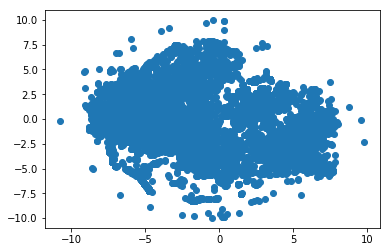

Wall time: 3min 1s


In [24]:
%%time
embedding_matrix
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 30, n_iter = 300)

temp = tsne.fit_transform(np.array(embedding_matrix))

plt.scatter(temp[:,0],temp[:,1])
plt.show()            

In [168]:
embedding_matrix


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.18970001,  0.050024  ,  0.19084001, ..., -0.39804   ,
         0.47646999, -0.15983   ],
       [-0.16169   ,  0.52358001, -0.20175999, ..., -0.46375   ,
         0.21377   , -0.26859   ],
       ...,
       [ 0.2254    , -0.26552999, -0.45802999, ..., -0.025668  ,
        -0.12529001, -0.54822999],
       [ 0.84087002,  0.65069997, -0.24196   , ...,  0.39234999,
        -0.55923998, -1.12609994],
       [ 0.057058  , -0.62190002, -0.32795   , ..., -0.037214  ,
        -0.4048    , -1.13699996]])

Since we have too many words, we choose the top 20 frequency words.

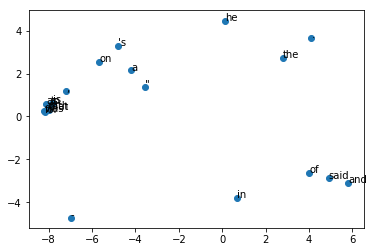

In [164]:
fig, ax = plt.subplots()
num = 20
ax.scatter(temp[:,0][0:num], temp[:,1][0:num])
for i, txt in enumerate(name[0:num]):
    ax.annotate(txt, (temp[:,0][0:num][i], temp[:,1][0:num][i]))


(-0.5, 0.5)

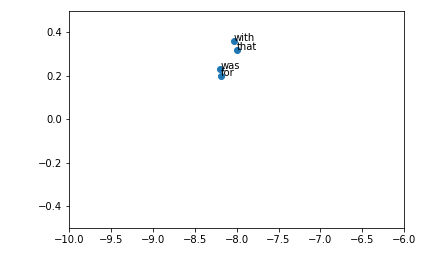

In [167]:
#Let's take a closer look
fig, ax = plt.subplots()
num = 20
ax.scatter(temp[:,0][0:num], temp[:,1][0:num])
for i, txt in enumerate(name[0:num]):
    ax.annotate(txt, (temp[:,0][0:num][i], temp[:,1][0:num][i]))
ax.set_xlim(-10,-6)
ax.set_ylim(-0.5,0.5)

As we can see, these words are "cluster" together.

## References

Source of data:
    https://www.kaggle.com/jsreddy79/text-classification-supervised-learning?fbclid=IwAR242MYwk-PMci6QYv9UBoabeSTTStuOfZVgFSU80V4FYm8Q7S0Vz5oNwPg